<a href="https://colab.research.google.com/github/sap0408/2048/blob/master/SeriesdeTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
!pip install tensorflow

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

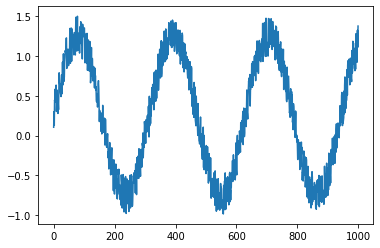

In [5]:
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+0.5*np.random.rand(N)
df = pd.DataFrame(x)
plt.plot(df)
plt.show()

In [6]:
df.head(10)

,0
0,0.104459
1,0.299635
2,0.128013
3,0.446484
4,0.422521
5,0.583666
6,0.418729
7,0.489220
8,0.633925
9,0.302486


In [7]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]
print(train.shape)
np.transpose(train[:10])

(800, 1)


array([[0.1044593 , 0.29963456, 0.12801256, 0.44648398, 0.42252056,
        0.58366576, 0.41872865, 0.48922012, 0.63392462, 0.30248586]])

In [0]:
step = 4
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [9]:
step=4
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
print("Secuencias de entrenamiento: " +str(trainX.shape))
print(trainX[:5])
print("\nEtiquetas de entrenamiento: " +str(trainY.shape))
print(trainY[:5])

Secuencias de entrenamiento: (800, 4)
[[0.1044593  0.29963456 0.12801256 0.44648398]
 [0.29963456 0.12801256 0.44648398 0.42252056]
 [0.12801256 0.44648398 0.42252056 0.58366576]
 [0.44648398 0.42252056 0.58366576 0.41872865]
 [0.42252056 0.58366576 0.41872865 0.48922012]]

Etiquetas de entrenamiento: (800,)
[0.42252056 0.58366576 0.41872865 0.48922012 0.63392462]


In [10]:
dfV = pd.DataFrame(np.concatenate((trainX, trainY.reshape(800,1)), axis=1))
dfV.columns = ["X1", 'X2','X3','X4','Y']
dfV.head()

,X1,X2,X3,X4,Y
0,0.104459,0.299635,0.128013,0.446484,0.422521
1,0.299635,0.128013,0.446484,0.422521,0.583666
2,0.128013,0.446484,0.422521,0.583666,0.418729
3,0.446484,0.422521,0.583666,0.418729,0.489220
4,0.422521,0.583666,0.418729,0.489220,0.633925


In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape 

(800, 1, 4)

In [12]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=1)

trainPredict = model.predict(trainX)

testPredict= model.predict(testX)

predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
800/800 [==============================] - 0s 542us/step - loss: 0.1182
Epoch 2/100
800/800 [==============================] - 0s 88us/step - loss: 0.0308
Epoch 3/100
800/800 [==============================] - 0s 100us/step - loss: 0.0293
Epoch 4/100
800/800 [==============================] - 0s 98us/step - loss: 0.0284
Epoch 5/100
800/800 [==============================] - 0s 92us/step - loss: 0.0286
Epoch 6/100
800/800 [==============================] - 0s 90us/step - loss: 0.0286
Epoch 7/100
800/800 [==============================] - 0s 93us/step - loss: 0.0280
Epoch 8/100
800/800 [==============================] - 0s 100us/step - loss: 0.0287
Epoch 9/100
800/800 [==============================] - 0s 91us/step - loss: 0.0281
Epoch 10/100
800/800 [==============================] - 0s 87us/step - loss: 0.0282
Epoch 11/100
800/800 [==============================] - 0s 88us/step - loss: 0.0280
Epoch 12/100
800/800 [==============================] - 0s 98us/step - loss: 0.028

In [14]:
trainScore = model.evaluate(trainX, trainY, verbose=1)
print(trainScore) 

800/800 [==============================] - 0s 61us/step
0.025998512133955955


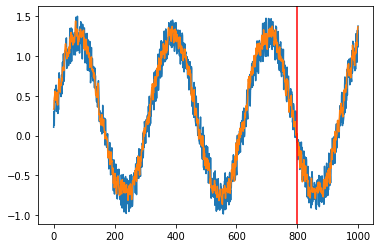

In [15]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show() 

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [19]:
df = pd.read_csv('time_series.csv',  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','unidades'])
df.head()

fecha
2017-01-02    236
2017-01-03    237
2017-01-04    290
2017-01-05    221
2017-01-07    128
Name: unidades, dtype: int64

In [20]:
df.describe()

count    604.000000
mean     215.935430
std       75.050304
min       51.000000
25%      171.000000
50%      214.000000
75%      261.250000
max      591.000000
Name: unidades, dtype: float64

In [21]:
print(df.index.min())
print(df.index.max())

2017-01-02 00:00:00
2018-11-30 00:00:00


In [22]:
print(len(df[:]))
print(len(df['2017']))
print(len(df['2018']))

604
315
289


In [23]:
meses =df.resample('M').mean()
meses

fecha
2017-01-31    203.923077
2017-02-28    184.666667
2017-03-31    182.964286
2017-04-30    198.960000
2017-05-31    201.185185
2017-06-30    209.518519
2017-07-31    278.923077
2017-08-31    316.000000
2017-09-30    222.925926
2017-10-31    207.851852
2017-11-30    185.925926
2017-12-31    213.200000
2018-01-31    201.384615
2018-02-28    190.625000
2018-03-31    174.846154
2018-04-30    186.000000
2018-05-31    190.666667
2018-06-30    196.037037
2018-07-31    289.500000
2018-08-31    309.038462
2018-09-30    230.518519
2018-10-31    209.444444
2018-11-30    184.481481
Freq: M, Name: unidades, dtype: float64

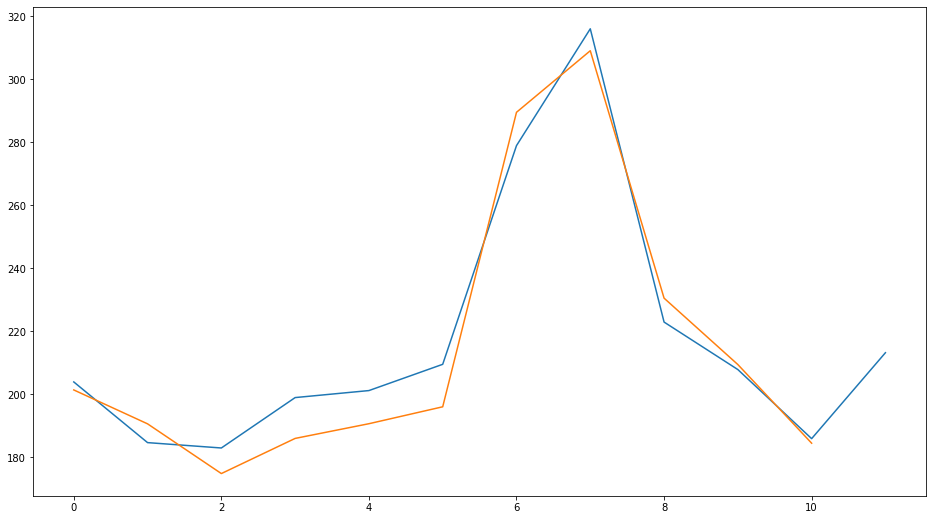

In [24]:
plt.plot(meses['2017'].values)
plt.plot(meses['2018'].values)
plt.show()

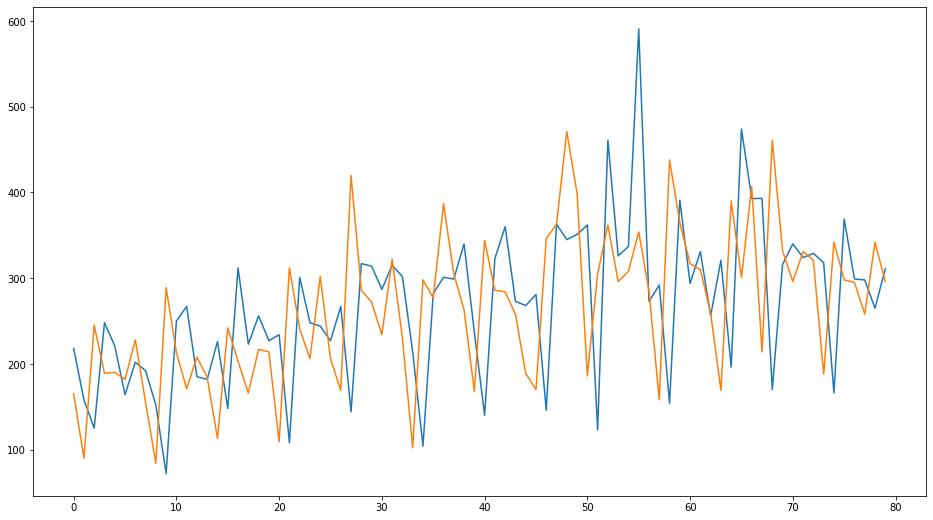

In [25]:
intersemestral2017 = df['2017-06-01':'2017-09-01']
plt.plot(intersemestral2017.values)
intersemstral2018 = df['2018-06-01':'2018-09-01']
plt.plot(intersemstral2018.values)
plt.show()

In [27]:
PASOS=7

# TRansforma la serie en un problema de aprendizaje supervisado
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Genera las secuencias de entrada (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Genera la secuencia  a predecir (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Junta todo
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Elimina filas con valores NAN
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# Dataset
values = df.values
# Pone todo en numeros flotantes
values = values.astype('float32')
# Normaliza lods datos
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# dataframe como un problema de aprendizaje supervisado
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.314815,-0.311111,-0.114815,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333
8,-0.311111,-0.114815,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407
9,-0.114815,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407,-0.522222
10,-0.370370,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407,-0.522222,-0.644444
11,-0.714815,-0.103704,-0.225926,-0.433333,-0.607407,-0.522222,-0.644444,-0.344444


In [28]:
# Partimos en entrenamiento y prueba
values = reframed.values
n_train_days = 315+289 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# Partimos en entradas y salidas
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# TRansformamos entrada a 3 dimnesiones [registros, pasos de tiempo, caracteristicas]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(567, 1, 7) (567,) (30, 1, 7) (30,)


In [0]:
def crear_modelo():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [30]:
EPOCHS=40

model = crear_modelo()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)
Model: "sequential_2"

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1, 7)              56        
_________________________________________________________________
flatten_1 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 567 samples, validate on 30 samples
Epoch 1/40
567/567 [==============================] - 0s 388us/step - loss: 0.2637 - mse: 0.1108 - val_loss: 0.2114 - val_mse: 0.0661
Epoch 2/40
567/567 [==============================] - 0s 179us/step - loss: 0.2317 - mse: 0.0877 - val_loss: 0.1920 - val_mse: 0.0560
Epoch 3/40
567/567 [==============================] - 0s 194us/step - loss:

30


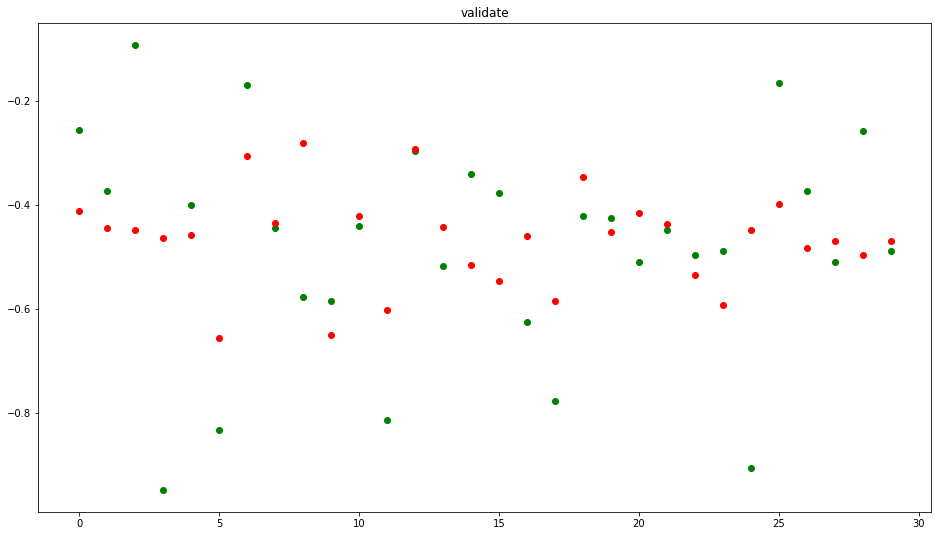

In [31]:
results=model.predict(x_val)
print( len(results) )
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

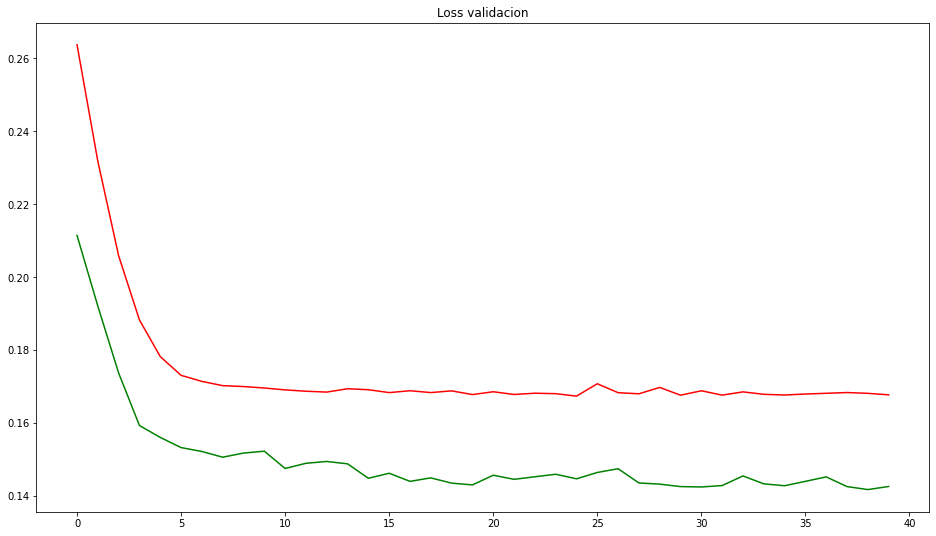

In [32]:
plt.plot(history.history['loss'],c='r')
plt.title('Loss exactitud')
plt.plot(history.history['val_loss'],c='g')
plt.title('Loss validacion')
plt.show()

In [33]:
history.history.keys()

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])

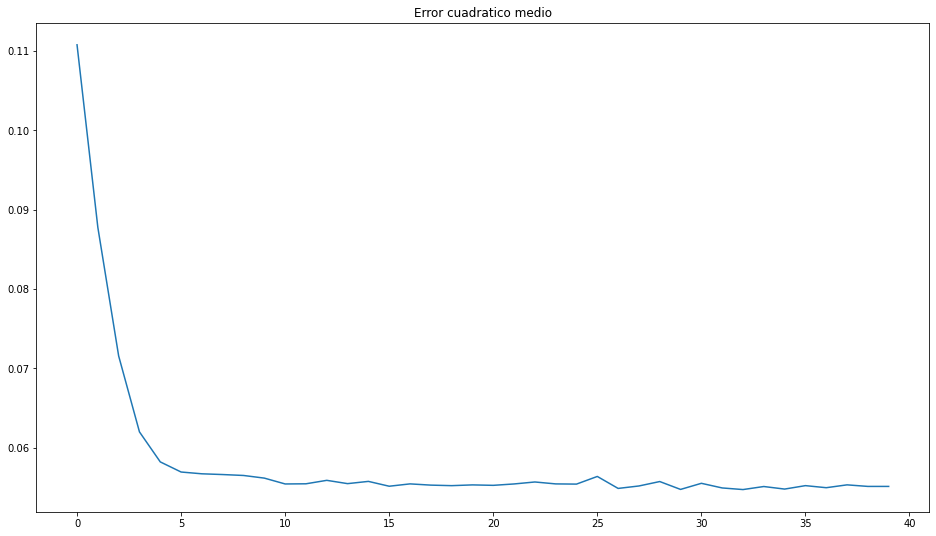

In [37]:
plt.title('Error cuadratico medio')
plt.plot(history.history['mse'])
plt.show()

In [35]:
compara = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara2 = pd.DataFrame(inverted)
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
compara2.head()

,real,prediccion,diferencia
0,252.000000,209.488602,42.511398
1,220.000000,201.034683,18.965317
2,296.000000,199.680466,96.319534
3,64.999992,195.476074,-130.476074
4,213.000000,197.118423,15.881577


In [36]:
compara2.describe()

,real,prediccion,diferencia
count,30.000000,30.000000,30.000000
mean,191.633331,195.178741,-3.545436
std,57.580811,25.265125,51.840378
min,64.999992,143.845703,-130.476074
25%,169.000000,182.783878,-24.479954
50%,200.500000,197.915375,-1.748344
75%,220.000000,206.228558,29.180687
max,296.000000,245.246017,96.319534


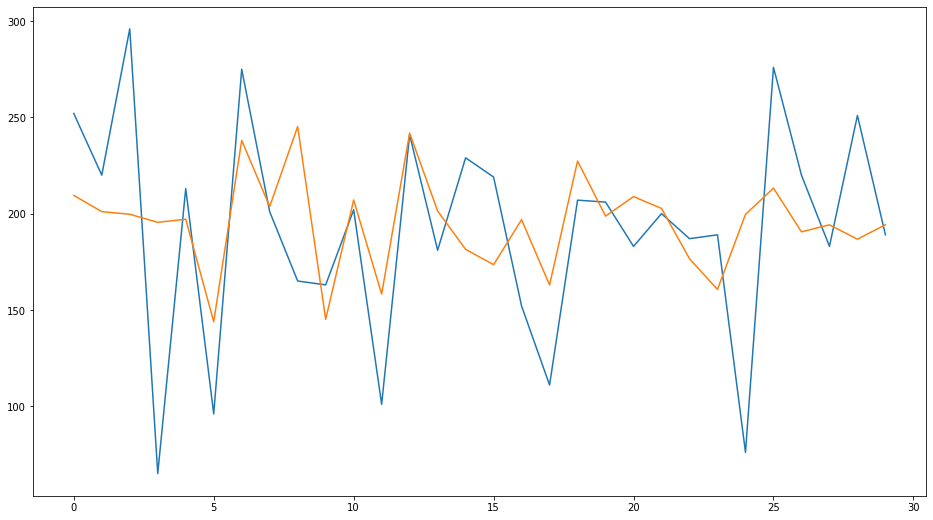

In [38]:
compara2['real'].plot()
compara2['prediccion'].plot()

In [39]:
ultimosDias = df['2018-11-16':'2018-11-30']
ultimosDias

fecha
2018-11-16    152
2018-11-17    111
2018-11-19    207
2018-11-20    206
2018-11-21    183
2018-11-22    200
2018-11-23    187
2018-11-24    189
2018-11-25     76
2018-11-26    276
2018-11-27    220
2018-11-28    183
2018-11-29    251
2018-11-30    189
Name: unidades, dtype: int64

In [40]:
values = ultimosDias.values
values = values.astype('float32')
values=values.reshape(-1, 1) 
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.24,-0.65,0.31,0.30,0.07,0.24,0.11
8,-0.65,0.31,0.30,0.07,0.24,0.11,0.13
9,0.31,0.30,0.07,0.24,0.11,0.13,-1.00
10,0.30,0.07,0.24,0.11,0.13,-1.00,1.00
11,0.07,0.24,0.11,0.13,-1.00,1.00,0.44
12,0.24,0.11,0.13,-1.00,1.00,0.44,0.07
13,0.11,0.13,-1.00,1.00,0.44,0.07,0.75


In [41]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(1, 1, 7)


array([[[ 0.11000001,  0.13      , -1.        ,  1.        ,
          0.44000006,  0.06999993,  0.75      ]]], dtype=float32)

In [0]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

In [43]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 0.11000001  0.13       -1.          1.          0.44000006
    0.06999993  0.75      ]]]
[[[ 0.13       -1.          1.          0.44000006  0.06999993
    0.75       -0.06024543]]]
[[[-1.          1.          0.44000006  0.06999993  0.75
   -0.06024543 -0.38505685]]]
[[[ 1.          0.44000006  0.06999993  0.75       -0.06024543
   -0.38505685  0.28418925]]]
[[[ 0.44000006  0.06999993  0.75       -0.06024543 -0.38505685
    0.28418925  0.30280516]]]
[[[ 0.06999993  0.75       -0.06024543 -0.38505685  0.28418925
    0.30280516  0.01208488]]]
[[[ 0.75       -0.06024543 -0.38505685  0.28418925  0.30280516
    0.01208488  0.2702311 ]]]


In [44]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([-0.06024543], dtype=float32), array([-0.38505685], dtype=float32), array([0.28418925], dtype=float32), array([0.30280516], dtype=float32), array([0.01208488], dtype=float32), array([0.2702311], dtype=float32), array([-0.03785562], dtype=float32)]


array([[169.97546002],
       [137.49431679],
       [204.41892902],
       [206.28051921],
       [177.20849109],
       [203.02311338],
       [172.21444113]])

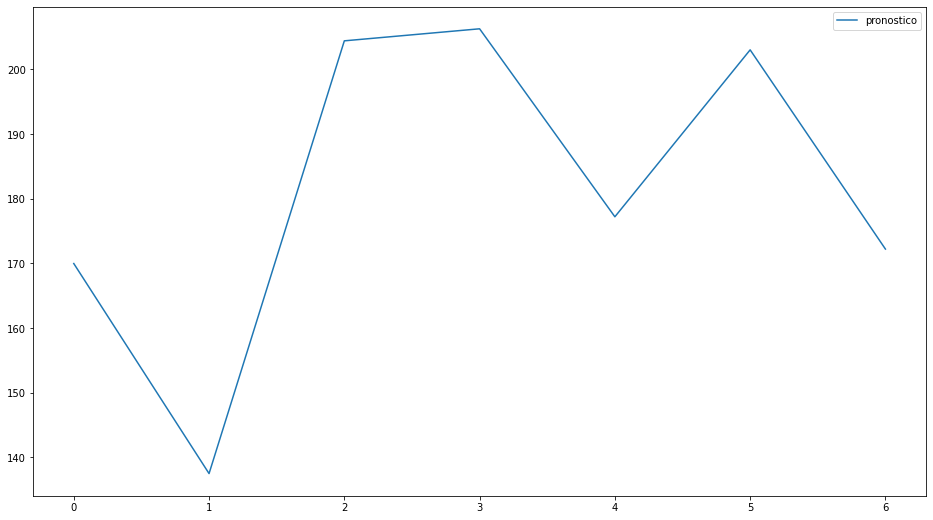

In [45]:
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico.csv')

In [46]:
prediccion1SemanaDiciembre

,pronostico
0,169.975460
1,137.494317
2,204.418929
3,206.280519
4,177.208491
5,203.023113
6,172.214441


In [47]:
i=0
for fila in prediccion1SemanaDiciembre.pronostico:
    i=i+1
    ultimosDias.loc['2018-12-0' + str(i) + ' 00:00:00'] = fila
    print(fila)
ultimosDias.tail(14)

169.9754600221394
137.4943167901259
204.41892901999344
206.28051920862166
177.20849109161998
203.0231133779089
172.21444112541766


fecha
2018-11-24 00:00:00    189.000000
2018-11-25 00:00:00     76.000000
2018-11-26 00:00:00    276.000000
2018-11-27 00:00:00    220.000000
2018-11-28 00:00:00    183.000000
2018-11-29 00:00:00    251.000000
2018-11-30 00:00:00    189.000000
2018-12-01 00:00:00    169.975460
2018-12-02 00:00:00    137.494317
2018-12-03 00:00:00    204.418929
2018-12-04 00:00:00    206.280519
2018-12-05 00:00:00    177.208491
2018-12-06 00:00:00    203.023113
2018-12-07 00:00:00    172.214441
Name: unidades, dtype: float64